In [198]:
import pandas as pd
from icecream import ic
import matplotlib.pyplot as plt

<p>Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и
количество детей клиента на факт погашения кредита в срок. Входные данные от банка —
статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга —
специальной системы, которая оценивает способность потенциального заёмщика вернуть
кредит банку.</p>

<b>Шаг 1.</b>Откройте таблицу и изучите общую информацию о данных

In [199]:
df = pd.read_csv('data.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<b>Шаг 2.</b>Предобработка данных

1.1 Пропущенные значения наблюдаются в столбцах 'days_employed' и 'total_income' по 2174 значения в каждом

1.2 Доля пропущенных значений:

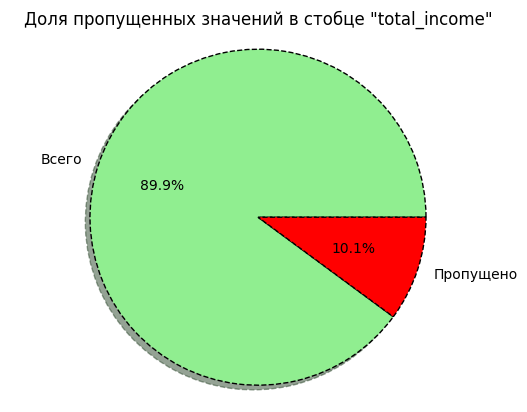

In [200]:
nan = df['total_income'].isnull().sum()
total = df['total_income'].count()
data = [total, nan]
labels = ['Всего', 'Пропущено']

plt.pie(data, labels=labels, colors=['lightgreen', 'red'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
plt.axis('equal')  # Равные пропорции для круга
plt.title('Доля пропущенных значений в стобце "total_income"')
plt.show()

1.3. Из возможных причин, по которым появились пропуски:
<li>Клиент не указал стаж и доход в анкете</li>
<li>Ошибка базы данных, из-за которой данные просто не внеслись</li>

1.4. Заполение пропусков данныз медианным значением:

In [201]:
median_total_income = df['total_income'].median()
df['total_income'] = df['total_income'].fillna(median_total_income)
df['total_income'].isnull().sum()

0

Почему в 'total_income' заполнить пропуски медианным значением - лучшее решение:
<li>Медиана сохраняет средний уровень дохода.
<li>Медиана менее восприимчива к выбросам.
<li>Медиана учитывает распределение и сохраняет его форму.
<li>Заполнение медианным значением просто и эффективно.

2.1 Обработка значений с аномалиями


In [202]:
def delAnomaly(value): 
    if value < 0: value *= -1
    return value

df['days_employed'] = df['days_employed'].apply(delAnomaly)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Возможные причины таких аномалий:
<li> Ошибка ввода данных.
<li> Изменение условий или контекста.
<li> Встроенные отрицательные значения в переменную.
<li> Систематическая ошибка в обработке данных.

2.2 Заполнение пропусков в 'days_employed' медианнымы значениями по стобцу

In [203]:
median_days_employed = df['days_employed'].median()
df['days_employed'] = df['days_employed'].fillna(median_days_employed)
df['days_employed'].isnull().sum()

0

3. Замена вещественного типа данных в 'total_income'

In [204]:
df['total_income'] = df['total_income'].astype(int)
df['total_income']

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int32

4. Удаление строк-дубликатов. Обработка неявных дубикатов.

In [205]:
from collections import Counter

for column, series in df.items():
    if pd.api.types.is_string_dtype(series):
        if column == 'gender' or column == 'income_type' or column == 'purpose':
            continue
        df[column] = df[column].str.lower()
        df[column] = df[column].drop_duplicates()

4.1. Метод выбирался с помощью документации pandas и гугла в целом.

4.2. Появление дубликатов возможно из-за системных ошибок, созданий повторных уч. записей и т.п.

5.Cоздание новых датафреймов и удаление старых

In [206]:
df_education = df[['education']].drop_duplicates().reset_index(drop=True)
df_education['education_id'] = df_education.index

df_family_status = df[['family_status']].drop_duplicates().reset_index(drop=True)
df_family_status['family_status_id'] = df_family_status.index

df = df.merge(df_education)
df = df.merge(df_family_status)
df = df.drop('education', axis='columns')
df = df.drop('family_status', axis='columns')
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,0,597.273402,21,2,1,F,компаньон,0,86954,операции с коммерческой недвижимостью
2,1,2194.220567,23,2,1,F,компаньон,0,145017,сыграть свадьбу
3,1,361.295346,22,2,1,F,компаньон,0,59702,операции с жильем
4,2,2369.914285,45,2,1,F,сотрудник,0,120133,на проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...
162,0,13264.142143,55,2,1,M,сотрудник,0,152595,на проведение свадьбы
163,0,1576.393455,39,2,1,M,компаньон,0,213192,строительство недвижимости
164,1,490.143881,27,2,1,F,сотрудник,0,295156,на проведение свадьбы
165,0,2194.220567,57,2,1,F,сотрудник,0,145017,свадьба


6.Создание столбца 'total_income_category' с категориями:

In [207]:
df['total_income_category'] = df['total_income']

for column, series in df.items():
    if column == 'total_income_category':
        df[column] = df[column].astype(int)
        for i in range(len(series)):
            if series[i] <= 30000:
                df.at[i, column] = 'E'
            elif series[i] <= 50000:
                df.at[i, column] = 'D'
            elif series[i] <= 200000:
                df.at[i, column] = 'C'
            elif series[i] <= 1000000:
                df.at[i, column] = 'B'
            else:
                df.at[i, column] = 'A'
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,0,597.273402,21,2,1,F,компаньон,0,86954,операции с коммерческой недвижимостью,C
2,1,2194.220567,23,2,1,F,компаньон,0,145017,сыграть свадьбу,C
3,1,361.295346,22,2,1,F,компаньон,0,59702,операции с жильем,C
4,2,2369.914285,45,2,1,F,сотрудник,0,120133,на проведение свадьбы,C
...,...,...,...,...,...,...,...,...,...,...,...
162,0,13264.142143,55,2,1,M,сотрудник,0,152595,на проведение свадьбы,C
163,0,1576.393455,39,2,1,M,компаньон,0,213192,строительство недвижимости,B
164,1,490.143881,27,2,1,F,сотрудник,0,295156,на проведение свадьбы,B
165,0,2194.220567,57,2,1,F,сотрудник,0,145017,свадьба,C


In [208]:
df['purpose_category'] = df['purpose']

for column, series in df.items():
    if column == 'purpose_category':
        for i in range(len(series)):
            if series[i].__contains__('жиль'):
                df.at[i, column] = 'операции с недвижимостью'
            elif series[i] <= 50000:
                df.at[i, column] = 'D'
            elif series[i] <= 200000:
                df.at[i, column] = 'C'
            elif series[i] <= 1000000:
                df.at[i, column] = 'B'
            else:
                df.at[i, column] = 'A'
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,покупка жилья
1,0,597.273402,21,2,1,F,компаньон,0,86954,операции с коммерческой недвижимостью,C,операции с коммерческой недвижимостью
2,1,2194.220567,23,2,1,F,компаньон,0,145017,сыграть свадьбу,C,сыграть свадьбу
3,1,361.295346,22,2,1,F,компаньон,0,59702,операции с жильем,C,операции с жильем
4,2,2369.914285,45,2,1,F,сотрудник,0,120133,на проведение свадьбы,C,на проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,13264.142143,55,2,1,M,сотрудник,0,152595,на проведение свадьбы,C,на проведение свадьбы
163,0,1576.393455,39,2,1,M,компаньон,0,213192,строительство недвижимости,B,строительство недвижимости
164,1,490.143881,27,2,1,F,сотрудник,0,295156,на проведение свадьбы,B,на проведение свадьбы
165,0,2194.220567,57,2,1,F,сотрудник,0,145017,свадьба,C,свадьба
